# Creating a Realistic Educational Dataset for Recommender Systems

In this tutorial, we focus on generating a realistic dataset that mirrors the progression patterns of various student learning profiles. This simulated dataset is essential for training and evaluating an educational recommender system that can adapt to individual learning curves and preferences.

## Student Learning Profiles

We'll consider four distinct learning profiles to simulate varied student behaviors:

1. **Consistent Progressor**: Exhibits steady and linear improvement in problem-solving skills.
2. **Late Bloomer**: Initially struggles but shows rapid improvement later on.
3. **Quick Starter**: Makes quick early progress but plateaus as time progresses.

## Implementing Learner Profiles in Python

To simulate these profiles, we'll develop Python functions that determine various aspects of a student's interaction with educational tasks, such as the correctness of their answers, the time spent on tasks, and the difficulty level of problems they tackle.

### Function Definitions

- `random_date`: Generates random date/times within a specified range.
- `assign_learner_profile`: Randomly assigns one of the predefined learner profiles to a student.
- `progress_proficiency`: Calculates the proficiency of a student over time, tailored to their assigned learner profile.
- `determine_success`: Decides whether a student correctly solves a problem based on their proficiency and the problem's difficulty.
- `determine_time_spent`: Estimates the time a student spends on a task, considering their proficiency and task difficulty.
- `determine_attempt_count` and `determine_hint_usage`: Calculate the number of attempts a student makes on a task and the number of hints they use, respectively.

In [1]:
import numpy as np
import random
import pandas as pd

# Function to generate random date/times for the attempts
def random_date(start, end):
    return start + timedelta(
        seconds=random.randint(0, int((end - start).total_seconds())),
    )

# Function to assign a learner profile to a student
def assign_learner_profile(student_id):
    profiles = ['Consistent', 'LateBloomer', 'QuickStarter']
    return random.choice(profiles)

def progress_proficiency(days_passed, profile_type):
    max_days = 30  # Maximum days considered for the month

    if profile_type == 'Consistent':
        # Linear improvement to reach max proficiency
        return min(1.0, days_passed / max_days)
    elif profile_type == 'LateBloomer':
        # Slow start with an exponential increase later
        return min(1.0, (days_passed / max_days) ** 4)
    elif profile_type == 'QuickStarter':
        # Rapid initial improvement then a logarithmic plateau
        return min(1.0, 1 - np.exp(-days_passed / 10))

def determine_success(proficiency, difficulty):
    difficulty_modifier = {'Easy': 0.2, 'Medium': 0.5, 'Hard': 0.8}
    # Adjusting success probability based on proficiency and difficulty
    success_probability = max(0, min(1, proficiency - difficulty_modifier[difficulty] + 0.5))

    # Return 1 (success) or 0 (failure) based on the calculated probability
    return 1 if random.random() < success_probability else 0

def determine_time_spent(proficiency, difficulty):
    # Base time in minutes for each difficulty level
    base_time = {'Easy': 5, 'Medium': 10, 'Hard': 20}

    # Adjust time based on proficiency (higher proficiency reduces time spent)
    time_spent = base_time[difficulty] * (1 - proficiency / 2)

    # Adding randomness to time spent for variability
    time_spent = np.random.normal(time_spent, 2)  # Adding a small standard deviation

    # Ensure time spent is within a realistic range
    return max(1, min(time_spent, 30))

def determine_attempt_count(proficiency, difficulty):
    # Base attempts for each difficulty level
    base_attempts = {'Easy': 1, 'Medium': 2, 'Hard': 3}

    # Adjust attempts based on proficiency (higher proficiency reduces attempts)
    attempts = base_attempts[difficulty] + np.random.poisson(1) - int(proficiency * 2)

    # Ensure attempts are within a realistic range
    return max(1, min(attempts, 5))

def determine_hint_usage(proficiency, difficulty):
    # Base hints for each difficulty level
    base_hints = {'Easy': 1, 'Medium': 2, 'Hard': 3}

    # Adjust hint usage based on proficiency (higher proficiency reduces hints)
    # Subtracting a factor of proficiency from the base hints
    hint_usage = max(0, base_hints[difficulty] - int(proficiency * 3))

    # Randomly adjust hint usage within a range to add variability
    hint_usage = np.random.randint(max(0, hint_usage - 1), min(hint_usage + 2, 4))

    # Ensure hint usage is within the 0 to 3 range
    return min(hint_usage, 3)

## Generating the Dataset

Using the above functions, we generate a dataset that captures a range of student interactions over a month-long period. Each student is assigned a random learning profile, and their interactions with various problems are simulated based on this profile.

### Dataset Characteristics

- Each student attempts a predefined number of problems.
- Problems have predetermined difficulty levels ('Easy', 'Medium', 'Hard').
- The dataset tracks metrics like correctness, time spent, attempt count, hint usage, problem difficulty, and days since the start of learning.

In [2]:
num_students = 100
problems_per_student = 30
# Number of unique problems
num_problems = 300

# Create a mapping of ProblemID to fixed difficulty levels
problem_difficulties = {i: random.choice(['Easy', 'Medium', 'Hard']) for i in range(1, num_problems + 1)}

# Dictionary to store the dataset
data = {
    'StudentID': [], 'ProblemID': [], 'Correctness': [],
    'TimeSpent': [], 'AttemptCount': [], 'HintUsage': [],
    'ProblemDifficulty': [], 'DaysSinceStart': []
}

for student_id in range(1, num_students+1):
    learner_profile = assign_learner_profile(student_id)
    for _ in range(problems_per_student): 
        days_since_start = random.randint(0, 30)  # Days since the start of the topic
        proficiency = progress_proficiency(days_since_start, learner_profile)

        # Randomly select a ProblemID and retrieve its fixed difficulty
        problem_id = random.randint(1, num_problems)
        difficulty_level = problem_difficulties[problem_id]

        correctness = determine_success(proficiency, difficulty_level)
        time_spent = determine_time_spent(proficiency, difficulty_level)
        attempt_count = determine_attempt_count(proficiency, difficulty_level)
        hint_usage = determine_hint_usage(proficiency, difficulty_level)

        # Add these values to the dataset
        data['StudentID'].append(student_id)
        data['ProblemID'].append(problem_id)
        data['Correctness'].append(correctness)
        data['TimeSpent'].append(time_spent)
        data['AttemptCount'].append(attempt_count)
        data['HintUsage'].append(hint_usage)
        data['ProblemDifficulty'].append(difficulty_level)
        data['DaysSinceStart'].append(days_since_start)

# Create DataFrame
df = pd.DataFrame(data)

### Saving the Dataset

The generated dataset is saved as a CSV file, which can be used for training and evaluating the recommender system.

In [3]:
# Save the DataFrame as a CSV file
csv_file = 'data/educational_recommender_data.csv'
df.to_csv(csv_file, index=False)

## Conclusion

This simulated dataset offers a realistic representation of different student learning patterns. It serves as a valuable resource for developing and fine-tuning an educational recommender system that can personalize learning experiences based on individual student progress and preferences.

## Testing

Some simple plotting to test that the functions are logical:

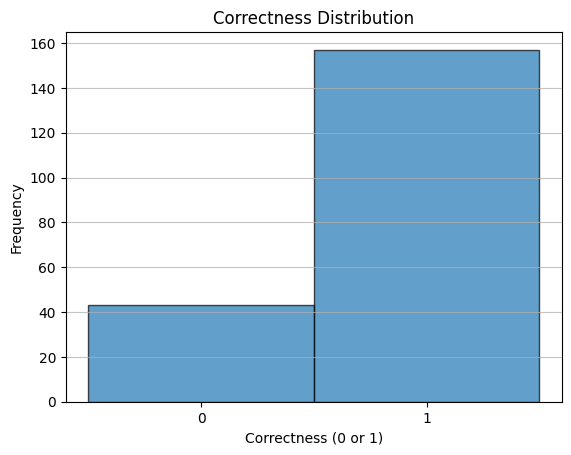

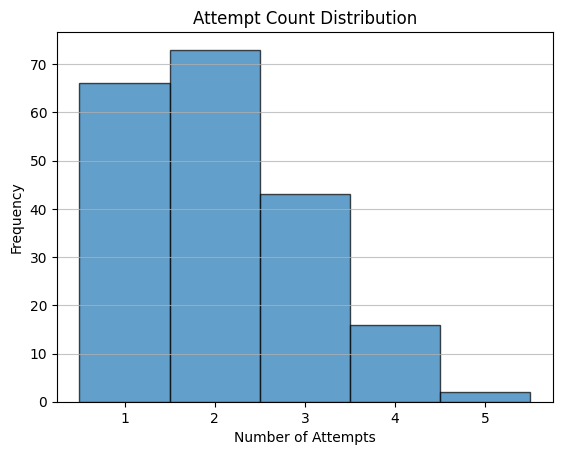

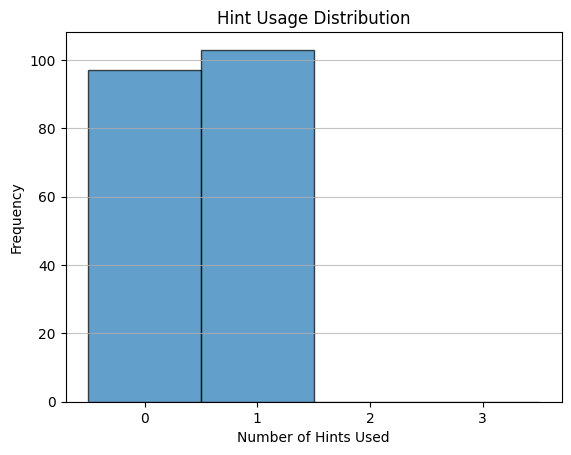

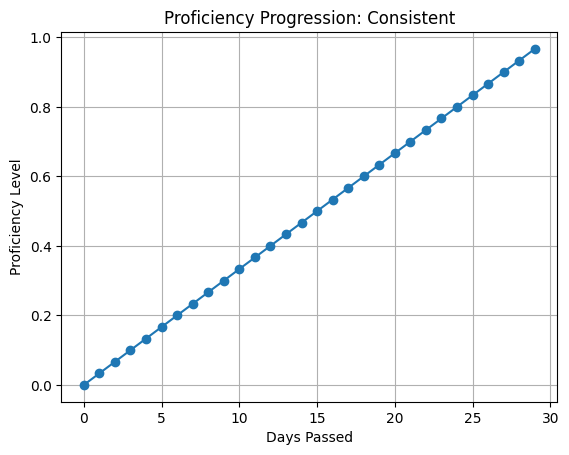

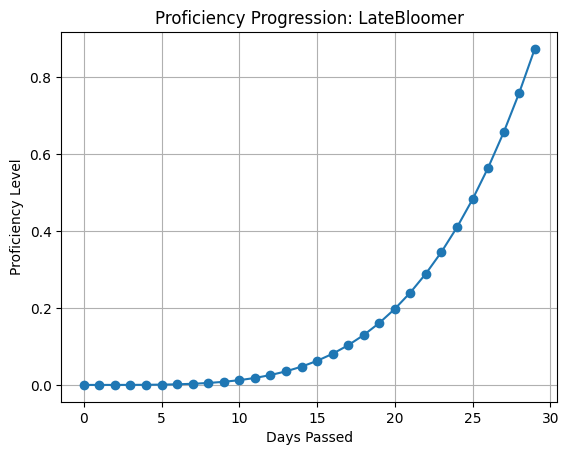

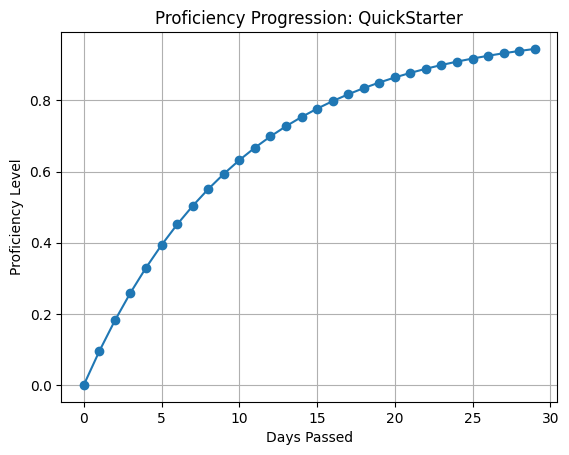

In [4]:
import matplotlib.pyplot as plt
import numpy as np

proficiency = 0.8
difficulty_level = 'Medium'

corr = []
ac = []
hu = []
for i in range(200):
    corr.append(determine_success(proficiency, difficulty_level))
    ac.append(determine_attempt_count(proficiency, difficulty_level))
    hu.append(determine_hint_usage(proficiency, difficulty_level))

# Plotting Correctness Distribution
plt.hist(corr, bins=np.arange(-0.5, 2.5, 1), edgecolor='black', alpha=0.7)
plt.title('Correctness Distribution')
plt.xlabel('Correctness (0 or 1)')
plt.ylabel('Frequency')
plt.xticks([0, 1])
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plotting Attempt Count Distribution
plt.hist(ac, bins=np.arange(0.5, 6.5, 1), edgecolor='black', alpha=0.7)
plt.title('Attempt Count Distribution')
plt.xlabel('Number of Attempts')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plotting Hint Usage Distribution
plt.hist(hu, bins=np.arange(-0.5, 4.5, 1), edgecolor='black', alpha=0.7)
plt.title('Hint Usage Distribution')
plt.xlabel('Number of Hints Used')
plt.ylabel('Frequency')
plt.xticks(range(0, 4))
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plotting Proficiency Progression
for profile_type in ['Consistent', 'LateBloomer', 'QuickStarter']:
    prof = []
    for days_passed in range(30):
        prof.append(progress_proficiency(days_passed, profile_type))
    
    plt.plot(np.arange(30), prof, marker='o')
    plt.title(f'Proficiency Progression: {profile_type}')
    plt.xlabel('Days Passed')
    plt.ylabel('Proficiency Level')
    plt.grid(True)
    plt.show()
